In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from my_functions import *

In [190]:
df_prep = pd.read_csv("..//datasets/gasometry_prepared_data.csv")
cols=["BETET",	"CO2TET",	"HCO3ACTE",	"HCO3STTE",	"O2SATTET",	"O2TET", "IONH"]
my_blue="#0064B2";
my_red="#D61600";

In [191]:
cols2=["BETET",	"CO2TET",	"O2TET", "IONH"]

In [192]:
df_miernik=df_prep[cols2]
stymulanty=["BETET", "O2TET"]
destymulanty=["IONH", "CO2TET"]
df_miernik[stymulanty]=df_miernik[stymulanty].applymap(lambda x: 0 if x > 0 else abs(x))
df_miernik[destymulanty]=df_miernik[destymulanty].applymap(lambda x: 0 if x < 1 else x-1)
# df_miernik["IONH"]=df_miernik["IONH"].apply(lambda x: 0 if x < 1 else x-1)
df_miernik

C:\Users\dorot\AppData\Local\Temp\ipykernel_62548\4291566349.py:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\dorot\AppData\Local\Temp\ipykernel_62548\4291566349.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dorot\AppData\Local\Temp\ipykernel_62548\4291566349.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\dorot\AppData\Local\Temp\ipykernel_62548\4291566349.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,BETET,CO2TET,O2TET,IONH
0,0.000000,1.21,0.72,0.882698
1,0.000000,4.22,0.00,0.425028
2,0.000000,2.10,0.00,1.201643
3,0.000000,1.75,0.00,0.882698
4,0.000000,1.61,0.00,0.970160
...,...,...,...,...
2929,0.717391,0.63,0.00,1.294287
2930,0.891304,0.39,0.00,1.254399
2931,1.065217,0.71,0.00,1.708690
2932,0.695652,0.15,0.00,0.857967


In [194]:
df_miernik_df=pd.concat([df_miernik, df_prep[["PACJENT_NR", "BADANIE_NR", "ZGON"]]], axis=1)         
df_miernik_df['Miernik'] = df_miernik.sum(axis=1)
df_miernik_df["Miernik_sum"]=df_miernik_df.groupby('PACJENT_NR')['Miernik'].cumsum()
# df_miernik_df.to_excel("miernik_skum.xlsx")

In [195]:
df_miernik_df

,BETET,CO2TET,O2TET,IONH,PACJENT_NR,BADANIE_NR,ZGON,Miernik,Miernik_sum
0,0.000000,1.21,0.72,0.882698,1.0,1.0,0.0,2.812698,2.812698
1,0.000000,4.22,0.00,0.425028,1.0,2.0,0.0,4.645028,7.457726
2,0.000000,2.10,0.00,1.201643,1.0,3.0,0.0,3.301643,10.759368
3,0.000000,1.75,0.00,0.882698,1.0,4.0,0.0,2.632698,13.392066
4,0.000000,1.61,0.00,0.970160,1.0,5.0,0.0,2.580160,15.972226
...,...,...,...,...,...,...,...,...,...
2929,0.717391,0.63,0.00,1.294287,145.0,5.0,1.0,2.641678,9.889567
2930,0.891304,0.39,0.00,1.254399,145.0,6.0,1.0,2.535704,12.425270
2931,1.065217,0.71,0.00,1.708690,145.0,7.0,1.0,3.483908,15.909178
2932,0.695652,0.15,0.00,0.857967,145.0,8.0,1.0,1.703619,17.612797


In [196]:
df_miernik_last = df_miernik_df.groupby('PACJENT_NR').last()
df_miernik_last["PACJENT_NR"]=df_miernik_last.index
df_miernik_last=df_miernik_last.reset_index(drop=True)

### PCA

In [241]:
# std_all = StandardScaler()
# train_data, test_data = train_test_split(df_miernik_last, test_size=0.2, stratify=df_miernik_last["ZGON"], random_state=42)
# train_data_std = std_all.fit_transform(X_train)
# train_data_std = pd.DataFrame(train_data_std, columns=X_train.columns)

X_data=df_miernik_last[cols2].reset_index(drop=True)
y_data=df_miernik_last["ZGON"].reset_index(drop=True)

pca = PCA(n_components=2)
components = pca.fit_transform(X_data)

components_df = pd.DataFrame(components, columns=['Czynnik 1', 'Czynnik 2'])

train_data_reset_index = df_miernik_last.reset_index(drop=True)
components_df_reset_index = components_df.reset_index(drop=True)

merged_data = pd.concat([train_data_reset_index, components_df_reset_index], axis=1)
merged_data

# pca.explained_variance_ratio_.sum()
print(merged_data.columns)
pca.components_

Index(['BETET', 'CO2TET', 'O2TET', 'IONH', 'BADANIE_NR', 'ZGON', 'Miernik',
       'Miernik_sum', 'PACJENT_NR', 'Czynnik 1', 'Czynnik 2'],
      dtype='object')


array([[ 0.12671901,  0.75907652,  0.00811991,  0.6384976 ],
       [ 0.52917771, -0.59544432, -0.0373172 ,  0.60334438]])

In [238]:
merged_data['ZGON'] = merged_data['ZGON'].astype(str)

merged_data['Czy pacjent zmarł?'] = merged_data['ZGON'].map({'1.0': 'tak', '0.0': 'nie'})

fig = px.scatter(merged_data, x='Czynnik 1', y='Czynnik 2', color='Czy pacjent zmarł?', width=800, opacity=0.8) #text="PACJENT_NR")
fig.update_traces(textposition='top center', showlegend=True, marker_size=14) 

fig.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=20),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=20)
    )
)
fig.update_layout(legend = dict(font = dict( size = 18)),
                  legend_title = dict(font = dict(size = 18)))
fig.update_layout(template="plotly_white")
fig.show()
fig.write_image("../images/"+"pca_miernik"+ ".png", width=1000, height=600, scale=4, format="png")


In [236]:
# Podziel dane na dwie ramki danych
df_zgon_0 = df_miernik_df[df_miernik_df['ZGON'] == 0]
df_zgon_1 = df_miernik_df[df_miernik_df['ZGON'] == 1]

# fig0 = make_subplots(rows=1, cols=2, subplot_titles=['Zgon: nie', 'Zgon: tak'])
# Wykres dla ZGON=0
fig1 = px.line(df_zgon_0, x='BADANIE_NR', y='Miernik_sum', color='PACJENT_NR', 
              labels={'BADANIE_NR': 'BADANIE_NR', 'Miernik_sum': 'Miernik', 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig1.update_xaxes(title_text='Numer badania')
fig1.update_yaxes(title_text='Skumulowany miernik negatywnych wyników')
fig1.update_layout(showlegend=False)

# Wykres dla ZGON=1
fig2 = px.line(df_zgon_1, x='BADANIE_NR', y='Miernik_sum', color='PACJENT_NR', 
               labels={'BADANIE_NR': 'BADANIE_NR', 'Miernik_sum': 'Miernik', 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig2.update_xaxes(title_text='Numer badania')
fig2.update_yaxes(title_text='Skumulowany miernik negatywnych wyników')
fig2.update_layout(showlegend=False)

fig1.update_yaxes(range=[0, 180])
fig2.update_yaxes(range=[0, 180])

fig1.update_xaxes(range=[0, 65])
fig2.update_xaxes(range=[0, 65])

fig1.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=20),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=20)
    )
)
fig2.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=24),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=24)
    )
)
fig1.update_layout(template="plotly_white")
fig2.update_layout(template="plotly_white")
# Wyświetl oba wykresy
fig1.show()
fig2.show()
fig1.write_image("../images/"+"miernik_pacjenci_wyleczeni"+ ".png", width=1000, height=800, scale=4, format="png")
fig2.write_image("../images/"+"miernik_pacjenci_zmarli"+ ".png", width=1000, height=800, scale=4, format="png")
# fig.write_html("miernik_pacjenci_wyleczeni.html")
# fig2.write_html("miernik_pacjenci_zmarli.html")
# fig0.write_html("ph_skumulowane.html")


### PCA2 

In [252]:
from sklearn.ensemble import RandomForestClassifier
train_data, test_data = train_test_split(df_miernik_last, test_size=0.2, stratify=df_miernik_last["ZGON"], random_state=42)

X_train=train_data[cols2].reset_index(drop=True)
y_train=train_data["ZGON"].reset_index(drop=True)

X_test=test_data[cols2].reset_index(drop=True)
y_test=test_data["ZGON"].reset_index(drop=True)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)

# Redukcja wymiarowości danych testowych za pomocą tych samych komponentów PCA
X_test_pca = pca.transform(X_test)

# Przewidywanie na danych testowych po redukcji wymiarowości
y_pred = model.predict(X_test_pca)

accuracy_assessment(y_pred, y_test)


Accuracy: 0.6818181818181818
Balanced accuracy: 0.6833333333333333
Precision: 0.6859504132231404
Sensivity (recall): 0.6818181818181818
F1-Score: 0.6824769433465085


### LDA

In [253]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)
y_pred=lda.predict(X_test_pca)

w = lda.coef_[0]
b = lda.intercept_

print(w)
accuracy_assessment(y_pred, y_test)

# comps=pd.DataFrame(components, columns=["Czynnik 1", "Czynnik 2"])
# comps["PACJENT_NR"]=train_data.index
# comps
# color_map = {1.0: 'red', 0.0: 'blue'}
# fig = px.scatter(comps, x='Czynnik 1', y='Czynnik 2', color=y_data, color_discrete_map=color_map, width=800)
# # # # # fig.write_image("images/pca.png")
# fig.show()


[0.54554002 0.25240394]
Accuracy: 0.7727272727272727
Balanced accuracy: 0.7946428571428572
Precision: 0.8099173553719008
Sensivity (recall): 0.7727272727272727
F1-Score: 0.7770334928229665


In [ ]:
def suma_iloczynow_wiersza(wiersz):
    return np.sum(wiersz)#* wagi)

df_miernik['Miernik'] = df_miernik.apply(suma_iloczynow_wiersza, axis=1)

C:\Users\dorot\AppData\Local\Temp\ipykernel_46296\1453554054.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_miernik_all=pd.DataFrame()
df_miernik_all[["PACJENT_NR", "BADANIE_NR", "ZGON"]]=df_prep[["PACJENT_NR", "BADANIE_NR", "ZGON"]]
df_miernik_all["Miernik"]=df_miernik["Miernik"]

In [ ]:
df_miernik_all

,PACJENT_NR,BADANIE_NR,ZGON,Miernik
0,1.0,1.0,0.0,2.812698
1,1.0,2.0,0.0,4.645028
2,1.0,3.0,0.0,3.301643
3,1.0,4.0,0.0,2.632698
4,1.0,5.0,0.0,2.580160
...,...,...,...,...
2929,145.0,5.0,1.0,2.641678
2930,145.0,6.0,1.0,2.535704
2931,145.0,7.0,1.0,3.483908
2932,145.0,8.0,1.0,1.703619


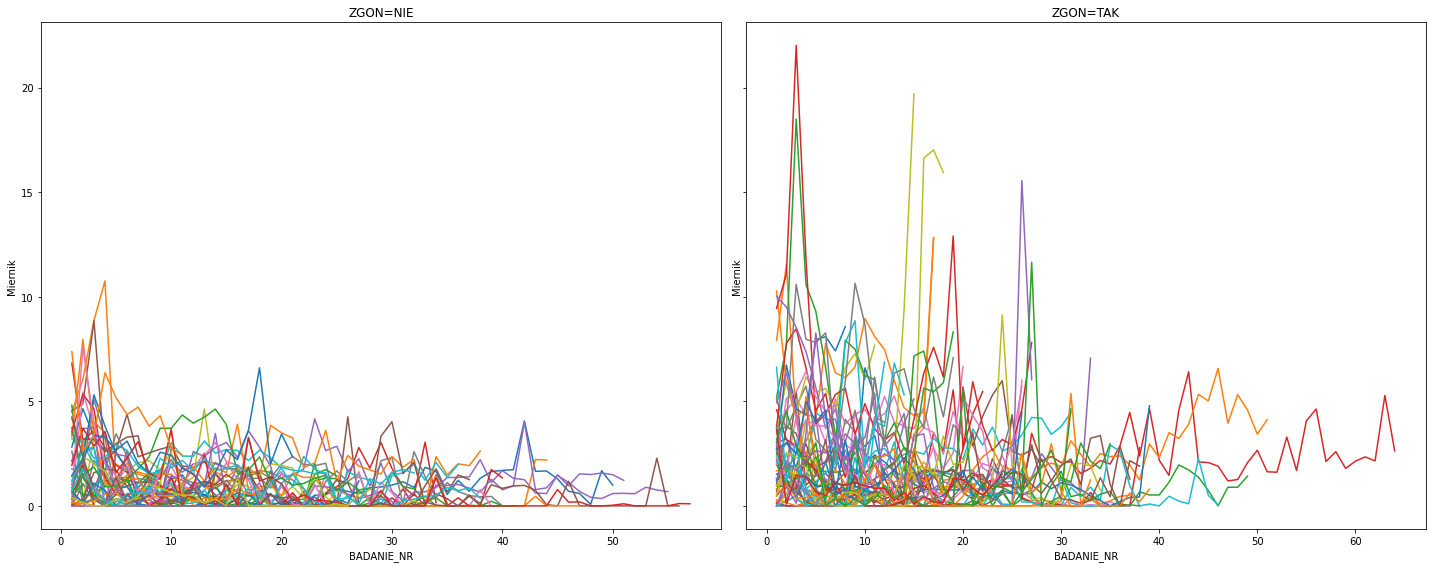

In [ ]:
df_zgon_0 = df_miernik_all[df_miernik_all['ZGON'] == 0]
df_zgon_1 = df_miernik_all[df_miernik_all['ZGON'] == 1]

# Stwórz dwa wykresy
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Wykres dla ZGON=0
for pacjent_nr, group in df_zgon_0.groupby('PACJENT_NR'):
    # if all(group['Miernik'].values <= 8):
        axes[0].plot(group['BADANIE_NR'].values, group['Miernik'].values, label=f'Pacjent {int(pacjent_nr)}')

axes[0].set_title('ZGON=NIE')
axes[0].set_xlabel('BADANIE_NR')
axes[0].set_ylabel('Miernik')

# Wykres dla ZGON=1
for pacjent_nr, group in df_zgon_1.groupby('PACJENT_NR'):
    # if all(group['Miernik'].values <= 8):
        axes[1].plot(group['BADANIE_NR'].values, group['Miernik'].values, label=f'Pacjent {int(pacjent_nr)}')

axes[1].set_title('ZGON=TAK')
axes[1].set_xlabel('BADANIE_NR')
axes[1].set_ylabel('Miernik')

plt.tight_layout()
plt.show()

C:\Users\dorot\AppData\Local\Temp\ipykernel_46296\3634101567.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning:

When grouping 

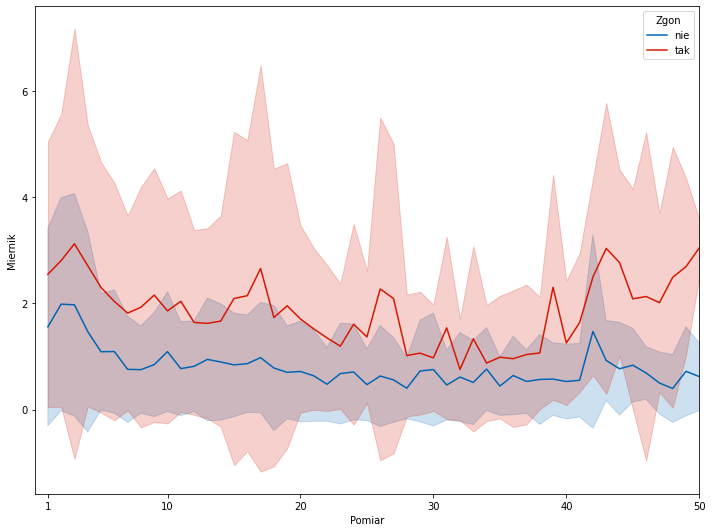

In [ ]:
df_line = df_miernik_all.copy()
df_line["ZGON"].replace({0: "nie", 1: "tak"}, inplace=True)

plt.figure(figsize=(10, 7.5), facecolor='white')

sns.lineplot(data=df_line, x="BADANIE_NR", y="Miernik", hue="ZGON", ci='sd',
                palette={'nie': my_blue, 'tak': my_red})

plt.xlabel('Pomiar')
plt.xlim(0, 50)
plt.xticks(ticks=[1, 10, 20, 30, 40, 50])
plt.legend(title="Zgon")
plt.tight_layout()

# Pokazywanie obrazu
plt.show()

In [ ]:
df_miernik_all_scum=df_miernik_all.copy()
df_miernik_all_scum["Miernik_sum"]=df_miernik_all.groupby('PACJENT_NR')['Miernik'].cumsum()
df_miernik_all_scum

,PACJENT_NR,BADANIE_NR,ZGON,Miernik,Miernik_sum
0,1.0,1.0,0.0,2.812698,2.812698
1,1.0,2.0,0.0,4.645028,7.457726
2,1.0,3.0,0.0,3.301643,10.759368
3,1.0,4.0,0.0,2.632698,13.392066
4,1.0,5.0,0.0,2.580160,15.972226
...,...,...,...,...,...
2929,145.0,5.0,1.0,2.641678,9.889567
2930,145.0,6.0,1.0,2.535704,12.425270
2931,145.0,7.0,1.0,3.483908,15.909178
2932,145.0,8.0,1.0,1.703619,17.612797


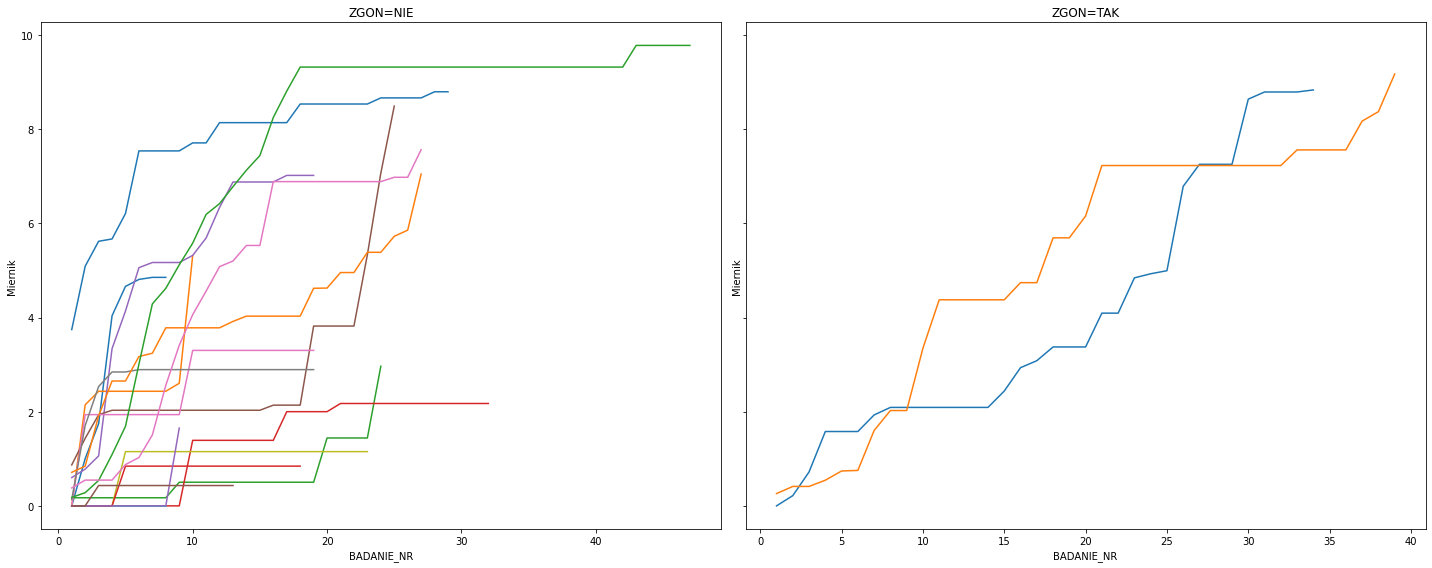

In [ ]:
df_zgon_0 = df_miernik_all_scum[df_miernik_all['ZGON'] == 0]
df_zgon_1 = df_miernik_all_scum[df_miernik_all['ZGON'] == 1]

# Stwórz dwa wykresy
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Wykres dla ZGON=0
for pacjent_nr, group in df_zgon_0.groupby('PACJENT_NR'):
     if all(group['Miernik_sum'].values <= 10):
        axes[0].plot(group['BADANIE_NR'].values, group['Miernik_sum'].values, label=f'Pacjent {int(pacjent_nr)}')

axes[0].set_title('ZGON=NIE')
axes[0].set_xlabel('BADANIE_NR')
axes[0].set_ylabel('Miernik')

# Wykres dla ZGON=1
for pacjent_nr, group in df_zgon_1.groupby('PACJENT_NR'):
    if all(group['Miernik_sum'].values <= 10):
        axes[1].plot(group['BADANIE_NR'].values, group['Miernik_sum'].values, label=f'Pacjent {int(pacjent_nr)}')

axes[1].set_title('ZGON=TAK')
axes[1].set_xlabel('BADANIE_NR')
axes[1].set_ylabel('Miernik')

plt.tight_layout()
plt.show()

In [ ]:
# Podziel dane na dwie ramki danych
df_zgon_0 = df_miernik_all_scum[df_miernik_all['ZGON'] == 0]
df_zgon_1 = df_miernik_all_scum[df_miernik_all['ZGON'] == 1]

fig0 = make_subplots(rows=1, cols=2, subplot_titles=['Scatter Plot', 'Box Plot'])

# Wykres dla ZGON=0
fig1 = px.line(df_zgon_0, x='BADANIE_NR', y='Miernik_sum', color='PACJENT_NR', 
              labels={'BADANIE_NR': 'BADANIE_NR', 'Miernik_sum': 'Miernik', 'PACJENT_NR': 'Pacjent'},
              title='ZGON=NIE', width=800, height=800)
fig1.update_xaxes(title_text='BADANIE_NR')
fig1.update_yaxes(title_text='Skumulowany miernik negatywnych wynikóW BE, pCO2 i IONH')
fig1.update_layout(showlegend=False)

# Wykres dla ZGON=1
fig2 = px.line(df_zgon_1, x='BADANIE_NR', y='Miernik_sum', color='PACJENT_NR', 
               labels={'BADANIE_NR': 'BADANIE_NR', 'Miernik_sum': 'Miernik', 'PACJENT_NR': 'Pacjent'},
               title='ZGON=TAK', width=800, height=800)
fig2.update_xaxes(title_text='BADANIE_NR')
fig2.update_yaxes(title_text='Skumulowany miernik negatywnych wynikóW BE, pCO2 i IONH')
fig2.update_layout(showlegend=False)

fig1.update_yaxes(range=[0, 100])
fig2.update_yaxes(range=[0, 100])
# Wyświetl oba wykresy
fig1.show()
fig2.show()
# fig.write_html("miernik_pacjenci_wyleczeni.html")
# fig2.write_html("miernik_pacjenci_zmarli.html")
# fig0.write_html("ph_skumulowane.html")


In [ ]:
df_prep = pd.read_csv("..//datasets/gasometry_prepared_data.csv")
cols=["BETET",	"CO2TET",	"HCO3ACTE",	"HCO3STTE",	"O2SATTET",	"O2TET", "IONH"]
my_blue="#0064B2";
my_red="#D61600";

#zobacz na oryginalnych danych